# Dynamics of the age of deputies of the Verkhovna Rada of Ukraine (2012-2019)

![rada](xxx.png) 

### 1. Age of deputies: known and unknown characteristics

#### Usually, after the elections, the media focus not only on the voting results and distribution of seats in the parliament, but also on various socio-demographic characteristics of the elected MPs, in particular their age. The attention to the latter is selective and limited mainly to the present time. The selectivity of attention is manifested in the coverage of certain details or things. As an example, the following can be mentioned. First, the name, party affiliation, exact age of the youngest and the oldest elected deputy. Secondly, the increase in the number of deputies of a certain age group, the boundaries of which can be defined differently. Youth is an illustration of such a group. Thirdly, the average age of elected deputies. The limitations of the present time are manifested in the absence of systematic comparisons of the age of MPs elected in the current and previous parliamentary elections.


#### Several things related to the age of elected MPs remain outside the scope of attention. These include the age structure of the Parliament. That is, the distribution of MPs by age groups and the number of the latter. It is also necessary to mention the variation (variability) of the age of elected deputies. Clarification of this fact allows us to see how heterogeneous the composition of the parliament is in terms of age. In addition, in most cases, the dynamics of age is overlooked. Observing the age of MPs over time helps to identify and assess the dynamics.

#### To answer the question of what is the age and what is its dynamics, data collection and analysis helps. The key points in data collection are to determine the age of the elected deputy and to define the boundaries and number of age groups.

### 2. Sources and methodology of data collection

#### When determining the age, the full number of years (without months and days) that the registered candidate had before the election day was taken into account. The calculation did not include candidates who later replaced those who terminated their deputy powers early.  The source of information were the websites of the CEC and the Verkhovna Rada of Ukraine.

#### The definition of the boundaries and number of age groups is of particular importance for making comparisons of the age of MPs both within one country over time and between countries in one particular time period. In our case, we combine the division of age groups used by the CEC and the Inter-Parliamentary Union (IPU). The elected deputies were divided into the following seven age groups: 21 - 30, 31 - 40, 41 - 50, 51 - 60, 61 - 70, 71 - 80, 81 - 90.

### 3. Analysis of the data obtained

#### The analysis of the data was aimed at finding out a number of things, namely: the distribution of deputies by age groups, the typical value of the age of deputies, the variation of the age of deputies and the dynamics of the above characteristics. The results of the data analysis are presented below in graphical and tabular form.

#### *a) Preliminary review and data transformation*

In [19]:
# Loading the necessary analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Downloading and previewing data
df = pd.read_excel('agedeputies.xlsx')
print(df.head())

   year          region  district             deputy  age  \
0  2012  кіровоградська        99      Табалов А. О.   34   
1  2012  кіровоградська       100     Березкін С. С.   53   
2  2012  кіровоградська       101  Грушевський В. А.   41   
3  2012  кіровоградська       102         Єдін О. Й.   52   
4  2012  кіровоградська       103    Кузьменко С. А.   37   

  subject of nomination age group  
0           Батьківщина     31-40  
1       Партія регіонів     51-60  
2       Партія регіонів     41-50  
3       Партія регіонів     51-60  
4       Партія регіонів     31-40  


In [21]:
# Finding out the completeness and type of data
df.isnull().sum()

year                     0
region                   0
district                 0
deputy                   0
age                      0
subject of nomination    0
age group                0
dtype: int64

In [22]:
df.dtypes

year                      int64
region                   object
district                  int64
deputy                   object
age                       int64
subject of nomination    object
age group                object
dtype: object

In [23]:
# Data transformation
df['year'] = df['year'].astype('str')
df.dtypes

year                     object
region                   object
district                  int64
deputy                   object
age                       int64
subject of nomination    object
age group                object
dtype: object

#### Thus, the verification and transformation of data allows us to proceed to their direct analysis

#### *b) Data visualization*

#### The first figure shows the distribution of MPs by age groups in the years when the last three parliamentary elections took place. Recall that the basis for the distribution by age groups was the age of the elected deputy before the election day. This figure makes it possible to see what the age structures of the Verkhovna Rada of Ukraine (at the beginning of its work) looked like after each election and compare them with each other.

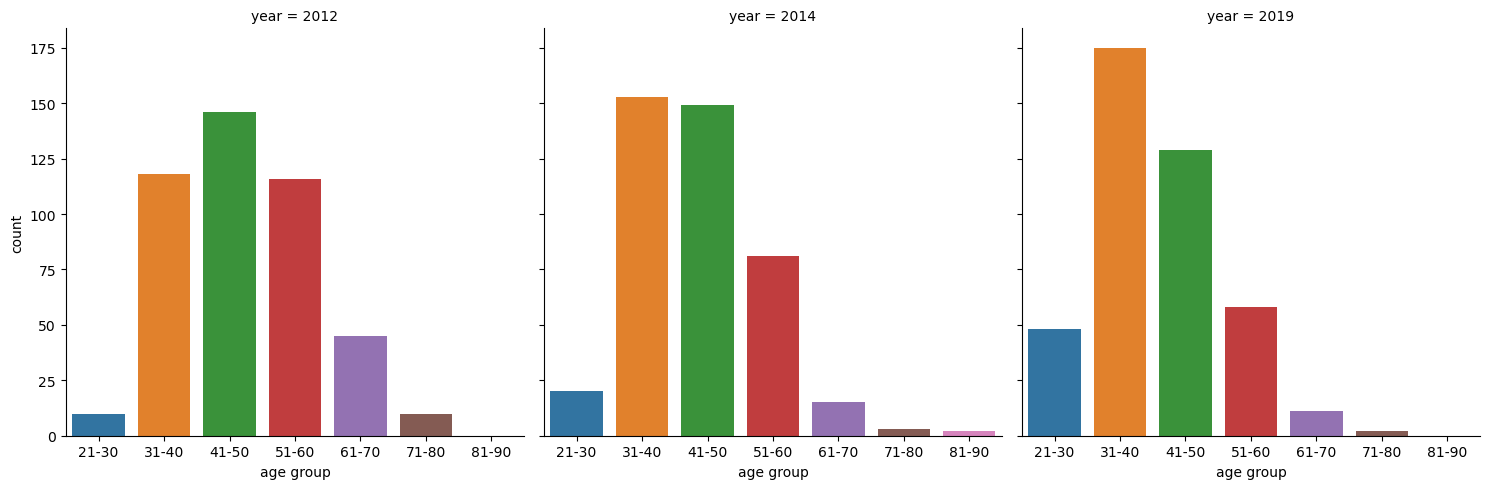

In [24]:
# Using the seaborn library to visualize the distribution of deputies by age groups
order = ['21-30','31-40','41-50','51-60','61-70','71-80','81-90']
sns.catplot(data=df,x='age group',col='year',kind='count',order=order)
plt.show()

#### The second figure shows the changes in each age group over time. Even a quick glance is enough to see the following trends: an increase in numbers for such age groups as 21 - 30 and 31 - 40; an increase followed by a decrease for 41 - 50; a decrease for 51 - 60, 61 - 70, 71 - 80. The age group 81 - 90 was represented only in the Parliament elected in 2014. The largest increase in the number is observed in such age group as 31 - 40 when comparing 2014 with 2012. The largest scale of decrease is characteristic of the age group 51 - 60 when comparing 2014 with 2012.  

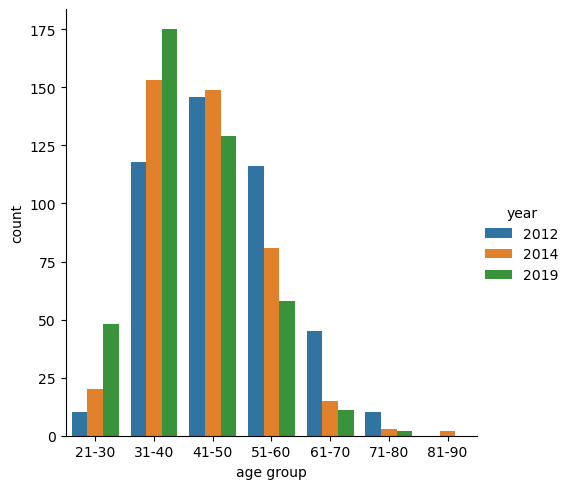

In [25]:
# Using the seaborn library to visualize changes in age groups
order = ['21-30','31-40','41-50','51-60','61-70','71-80','81-90']
sns.catplot(data=df,x='age group',hue='year',kind='count',order=order)
plt.show()

#### *c) Age of MPs: typical values, variations and dynamics*

#### The typical age value is a generalized characteristic that shows around which value the rest are grouped. That is, it expresses the central tendency. Usually, in practice, only the mean (calculated as an arithmetic mean) is given as a measure. However, if the shape of the distribution is skewed, then such a measure as the mean no longer accurately reflects the typical value of age. Therefore, it is necessary to use additionally such measure as median. In this case, we will get the value of age, which will divide the deputies into two equal parts. The first part will include those who are younger than the specified age, the second - older. 

In [26]:
# Using pandas library to find out the typical age of deputies
m = round(df['age'].groupby(df['year']).agg(['mean','median']),2)
print(m)

       mean  median
year               
2012  47.52    47.0
2014  43.77    42.0
2019  41.32    40.0


#### What do the data presented in the table show? First, within this time period, there is a tendency to decrease the typical age value. Second, the scale of the decrease is larger when comparing all measures of 2014 with measures of 2012 than when comparing measures of 2019 and 2014.

#### Usually in statistics the standard deviation is used as a measure of variation. However, for skewed distributions, it is also worth using the mean absolute deviation as a complementary measure. These measures show the typical distance of an observation from the mean. Data on variation give an idea of how heterogeneous the composition of the majority of MPs is in terms of age. The higher the value of the above measures, the more heterogeneous the age of the deputies is in relation to the average.

In [27]:
# Using pandas library to find out the degree of variation in the age of deputies
m1 = round(df['age'].groupby(df['year']).agg(['std','mad']),2)
print(m1)

        std   mad
year             
2012  10.51  8.62
2014   9.66  7.64
2019   9.35  7.53


#### Thus, the data in the table shows that in terms of the age of MPs, the Parliament elected in 2012 looked somewhat more heterogeneous than in other years.

### 4. Prospects for analyzing the age of deputies

#### The data presented above both in graphical and tabular form give a comprehensive picture of the dynamics of the age of MPs. However, does the age of a deputy matter? One can hear both negative and positive answers to this question. Usually, they are based on intuition, personal experience or broad generalizations based on very few observations. For empirically oriented political science this question is open and at the same time very general. To get concrete answers, it is necessary to ask more specific questions. For example, does the age of an MP affect legislative activity (the number and quality of submitted bills, amendments, etc.); is there a connection between the age of an MP and his/her attention to education, healthcare and environmental protection issues; does the age of an MP affect his/her compliance with party discipline; is age related to cooperation and competition between MPs, etc. Systematic data collection and analysis will provide answers. 